In [1]:
import TurbPy as tb
from TurbPy.imports import *



# deck = 'KH_Lv1di/'
# deck = 'KH_new/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'
# deck = 'KH_beta0.1/'
# deck = 'turb2/'

from collections import OrderedDict

linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

dirs = '/pscratch/sd/g/goodwill/' + deck
data = dirs + 'data/'
figs = '/pscratch/sd/g/goodwill/Fig/' + deck
info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)
twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))
lx_de = info['Lx/de']
ly_de = info['Ly/de']
lx_di = info['Lx/di']
ly_di = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])
lxr_di = np.linspace(0, lx_di, nx-200)
lyr_di = np.linspace(0, ly_di, ny)
lxr_de = np.linspace(0, lx_de, nx)
lyr_de = np.linspace(0, ly_de, ny)
dx = lx_de/nx
dy = ly_de/ny

tsnap = [510, 1124]

In [2]:

x = 0
y = 0

# fig.subplots()
# subfigs = fig.subfigures(3,2)
# print(ax.shape)
for t in tsnap:
  print(twci[t])
  f = tb.load_field_fil(dirs, times[t])
  el = tb.load_hydro_fil(dirs, times[t], 'electron')
  ion = tb.load_hydro_fil(dirs, times[t], 'ion')

  j = np.sqrt((el['jx'] + ion['jx'])**2 + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2)
  jrms = np.sqrt(np.mean(j**2))
  jnrm = j/jrms

  QDe = tb.QD_calc(dirs, t, sp = 'electron')
  QDi = tb.QD_calc(dirs, t, sp = 'ion')

  QJe, QJi, QJ = tb.QJ_calc(dirs, t)

  Qwe = tb.Qw_calc(dirs, t, sp = 'electron')
  Qwi = tb.Qw_calc(dirs, t, sp = 'ion')

  df = pd.DataFrame()
  emask = np.linspace(0, 5, 200)
  Jie, JeE, JE = tb.JE_calc(dirs, times[t])
  pthe, pide = tb.ps_calc(dirs, times[t], 'electron')
  pthi, pidi = tb.ps_calc(dirs, times[t], 'ion')

  pide = pide[1:-1]
  pidi = pidi[1:-1]

  # print(pide.shape)
  # print(pidi.shape)
  # print(Qwe.shape)
  # print(Qwi.shape)
  # print(QDe.shape)
  # print(QDi.shape)
  # print(QJ.shape)
 
  pid_rat = np.average(pidi)/np.average(pide)
  Qe_row = []
  tsize = 14
  for fn in emask:  
    QDe_thres = np.where(QDe > fn)
    QJe_thres = np.where(QJ > fn)
    Qwe_thres = np.where(Qwe > fn)
    
    # JE_QDe =   np.average(JE[QDe_thres])
    pide_QDe = np.average(pide[QDe_thres])
    # pidi_QDe = np.average(pidi[QDe_thres])
    # pidi_QDe = pidi_QDe / pid_rat
    pide_Qwe = np.average(pide[Qwe_thres])
    # pidi_QJe = np.average(pidi[QJe_thres])
    
    pide_QJe = np.average(pide[QJe_thres])
    QJe_cnt = len(QJe_thres[0])
    Qwe_cnt = len(Qwe_thres[0])
    QDe_cnt = len(QDe_thres[0])
    Qe_row.append({
      'QJe': QJe_cnt, 
      'Qwe': Qwe_cnt,
      'QDe': QDe_cnt,
      'pide_Qwe': pide_Qwe,
      'pide_QDe': pide_QDe, 
      # 'pidi_QDe': pidi_QDe, 
      'pide_QJe': pide_QJe, 
      # 'pidi_QJe': pidi_QJe
      })
  # df =pd.DataFrame(row)
  Qi_row = []
  imask = np.linspace(0, 3, 200)
  for ifn in imask:  
    QDi_thres = np.where(QDi > ifn)
    QJi_thres = np.where(QJ > ifn)
    Qwi_thres = np.where(Qwi > ifn)
    # JE_QDi =   np.average(JE[QDi_thres])
    pidi_QDi = np.average(pidi[QDi_thres])
    pidi_Qwi = np.average(pidi[Qwi_thres])
    # pide_QDi = np.average(pide[QDi_thres])
    # pide_QDi = pide_QDi * pid_rat
    pidi_QJi = np.average(pidi[QJi_thres])
    # pide_QJi = np.average(pide[QJi_thres])
    QJi_cnt = len(QJi_thres[0])
    Qwi_cnt = len(Qwi_thres[0])
    QDi_cnt = len(QDi_thres[0])
    Qi_row.append({
      'QJi': QJi_cnt, 
      'Qwi': Qwi_cnt,
      'QDi': QDi_cnt,
      # 'pide_QDi': pide_QDi, 
      'pidi_Qwi': pidi_Qwi,
      'pidi_QDi': pidi_QDi,
      # 'pide_QJi': pide_QJi, 
      'pidi_QJi': pidi_QJi
      })
  Qe_cond = pd.DataFrame(Qe_row)
  Qi_cond = pd.DataFrame(Qi_row)
  df = pd.concat([Qe_cond, Qi_cond], axis = 1, join = 'inner')
  df.to_csv(data + f'Q_{int(t)}.csv')

70.43446800000001


(1078, 2560)
155.23204320000002
(1078, 2560)


In [3]:
print(info['Lx/di']/info['nx'])

0.009765625


In [4]:
print(np.shape(QJ[1:-1]))

(1076, 2560)


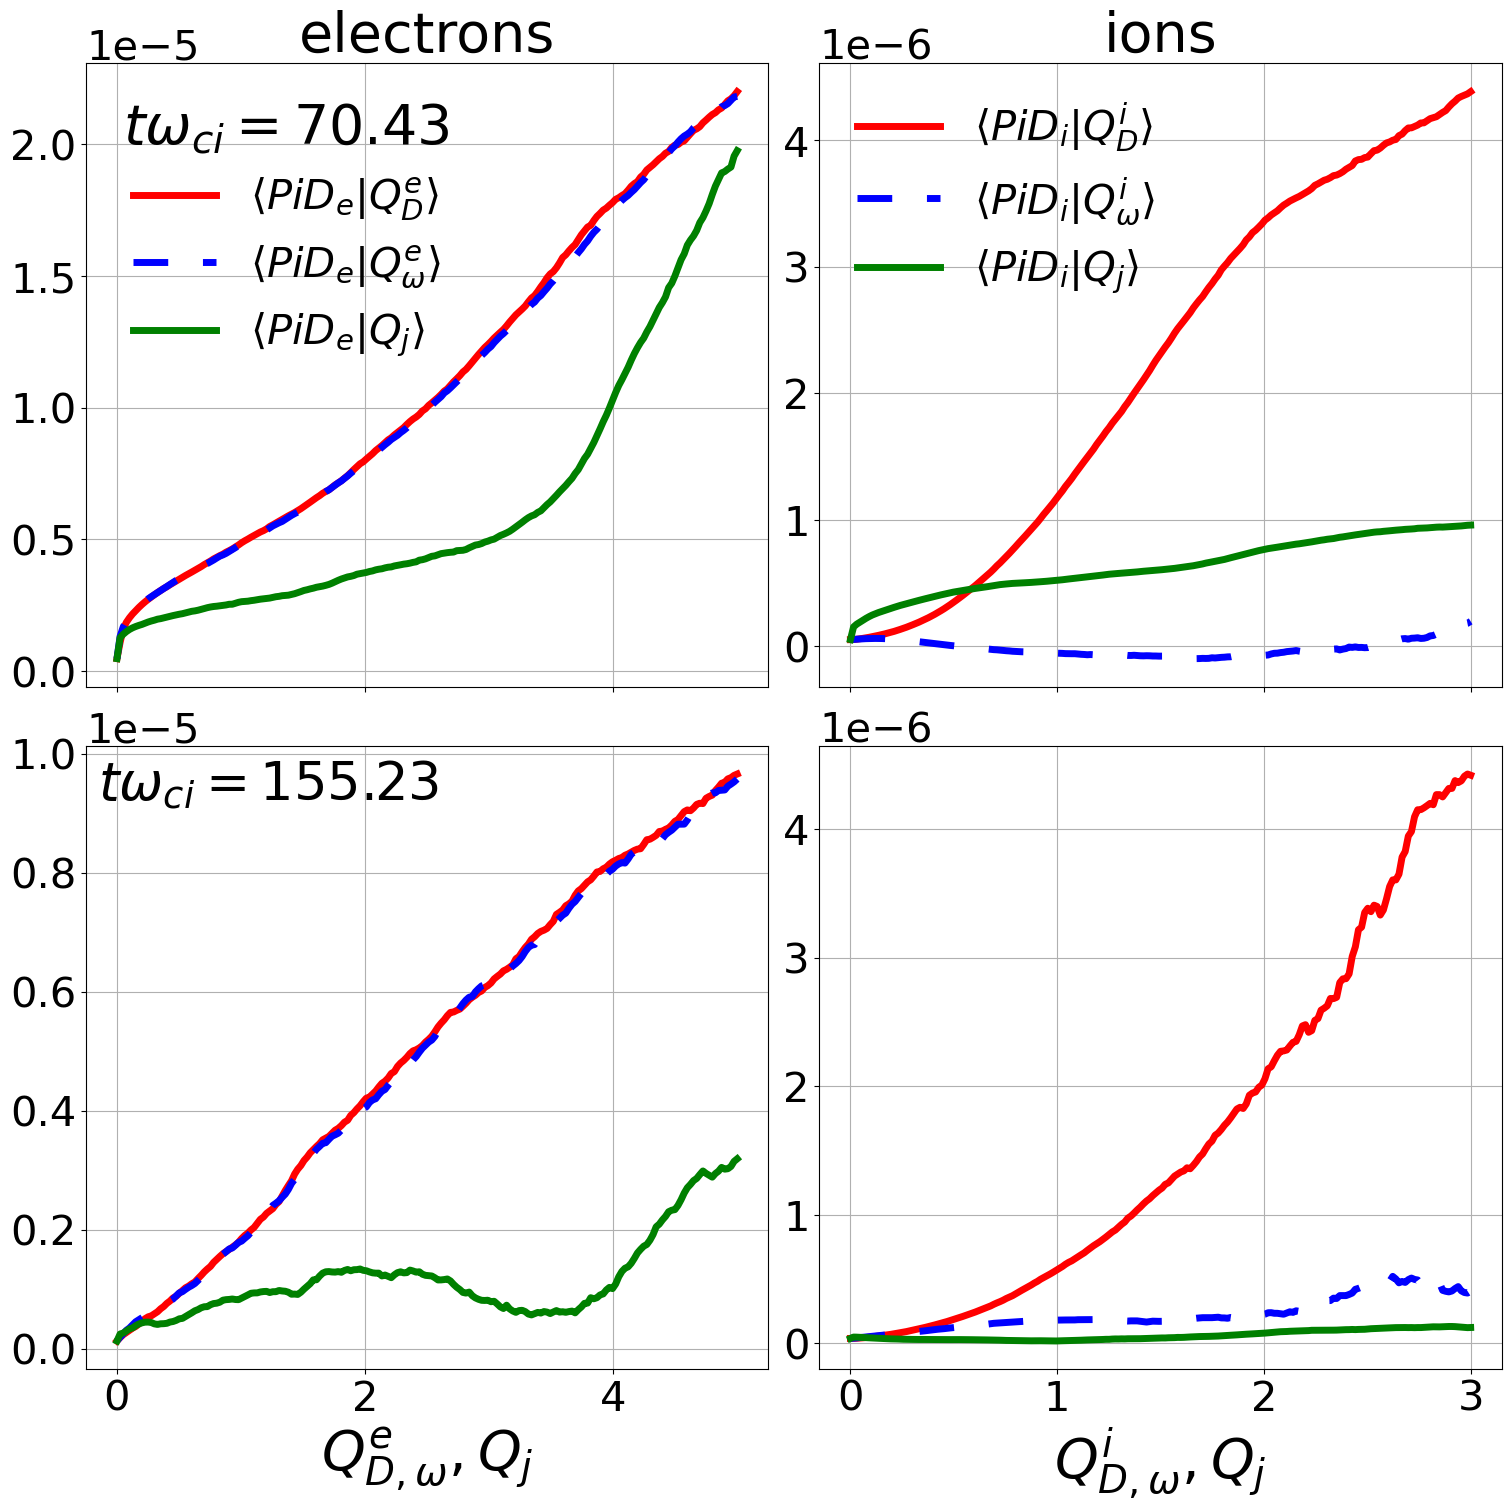

In [8]:
fig, ax = plt.subplots(2,2, figsize = (15, 15), sharex = 'col', layout = 'constrained')
lw = 5
Q510 = pd.read_csv(data + f'Q_{int(tsnap[0])}.csv')
Q1124 = pd.read_csv(data + f'Q_{int(tsnap[1])}.csv')

#### electron 510
ax[0,0].plot(emask, Q510['pide_QDe'],color = 'red', label = r'$\langle PiD_e | Q_D^e\rangle$', linewidth = lw )
ax[0,0].plot(emask, Q510['pide_Qwe'],color = 'blue',linestyle = linestyles['dashed'],label = r'$\langle PiD_e | Q_\omega^e\rangle$', linewidth = lw )
ax[0,0].plot(emask, Q510['pide_QJe'],color = 'green',label = r'$\langle PiD_e | Q_j\rangle$', linewidth = lw )
ax[0,0].grid(which = 'both')
# ax[0,0].set_ylim(-1e-7,9e-6)
ax[0,0].yaxis.offsetText.set_fontsize(30)
ax[0,0].set_title(r'$t \omega_{ci} = $'f'{np.round(twci[tsnap[0]],2)}', fontsize = 40)
# ax2 = ax[0,0].twinx()
# ax2.plot(emask, Q510['QDe'], linestyle = 'dashed', color = 'red')
# ax2.plot(emask, Q510['Qwe'], linestyle = 'dashed', color = 'blue')
# ax2.plot(emask, Q510['QJe'], linestyle = 'dashed', color = 'green')
# ax2.set_ylabel('Counts')
# ax2.set_yscale('log')

#### electron 1124
ax[1,0].plot(emask, Q1124['pide_QDe'],color = 'red', label = r'$\langle PiD_e | Q_D^e\rangle$', linewidth = lw )
ax[1,0].plot(emask, Q1124['pide_Qwe'],color = 'blue',linestyle = linestyles['dashed'],label = r'$\langle PiD_e | Q_\omega^e\rangle$', linewidth = lw )
ax[1,0].plot(emask, Q1124['pide_QJe'],color = 'green',label = r'$\langle PiD_e | Q_j\rangle$', linewidth = lw )
ax[1,0].grid(which = 'both')
# ax[0,0].set_ylim(-1e-7,9e-6)
ax[1,0].yaxis.offsetText.set_fontsize(30)
# ax2 = ax[1,0].twinx()
# ax2.plot(emask, Q1124['QDe'], linestyle = 'dashed', color = 'red')
# ax2.plot(emask, Q1124['Qwe'], linestyle = 'dashed', color = 'blue')
# ax2.plot(emask, Q1124['QJe'], linestyle = 'dashed', color = 'green')
# ax.set_ylabel('Counts')
# ax.set_yscale('log')

#### ion 510
ax[0,1].plot(imask, Q510['pidi_QDi'], color = 'red', label = r'$\langle PiD_i | Q_D^i\rangle$', linewidth = lw )
ax[0,1].plot(imask, Q510['pidi_Qwi'], color = 'blue', linestyle = linestyles['dashed'], label = r'$\langle PiD_i | Q_\omega^i\rangle$', linewidth = lw )
ax[0,1].plot(imask, Q510['pidi_QJi'], color = 'green', label = r'$\langle PiD_i | Q_j\rangle$', linewidth = lw )
ax[0,1].grid(which = 'both')
# ax[1,0].set_xlim(0,0.020)
# ax[1,0].set_ylim(-1e-7,2e-6)
ax[0,1].yaxis.get_offset_text().set_fontsize(30)
# ax2 = ax[0,1].twinx()
# ax2.plot(imask, Q510['QDi'], linestyle = 'dashed', color = 'red')
# ax2.plot(imask, Q510['Qwi'], linestyle = 'dashed', color = 'blue')
# ax2.plot(imask, Q510['QJi'], linestyle = 'dashed', color = 'green')
# ax2.set_ylabel('Counts')
# ax2.set_yscale('log')



#### ion 1124
ax[1,1].plot(imask, Q1124['pidi_QDi'], color = 'red', label = r'$\langle PiD_i | Q_D^i\rangle$', linewidth = lw )
ax[1,1].plot(imask, Q1124['pidi_Qwi'], color = 'blue', linestyle = linestyles['dashed'], label = r'$\langle PiD_i | Q_\omega^i\rangle$', linewidth = lw )
ax[1,1].plot(imask, Q1124['pidi_QJi'], color = 'green', label = r'$\langle PiD_i | Q_j\rangle$', linewidth = lw )
ax[1,1].grid(which = 'both')
# ax[1,0].set_xlim(0,0.020)
# ax[1,0].set_ylim(-1e-7,2e-6)
ax[1,1].yaxis.get_offset_text().set_fontsize(30)
# ax2 = ax[1,1].twinx()
# ax2.plot(imask, Q1124['QDi'], linestyle = 'dashed', color = 'red')
# ax2.plot(imask, Q1124['Qwi'], linestyle = 'dashed', color = 'blue')
# ax2.plot(imask, Q1124['QJi'], linestyle = 'dashed', color = 'green')
# ax2.set_ylabel('Counts')
# ax2.set_yscale('log')


twcis = np.round(twci[tsnap],2)

ax[0,0].legend(loc = 'upper left', title = r'$t \omega_{ci} = 'f'{twcis[0]}$',title_fontsize = 40, fontsize = 30, frameon = False)
ax[0,1].legend(loc = 'upper left',fontsize = 30, frameon = False)
ax[0,0].tick_params(labelsize = 30)
ax[1,0].tick_params(labelsize = 30)

ax[0,1].tick_params(labelsize = 30)
ax[1,1].tick_params(labelsize = 30)

ax[1,0].legend('', loc = 'upper left', title = r'$t \omega_{ci} = 'f'{twcis[1]}$',title_fontsize = 38, frameon = False)
# ax[3,1].tick_params(labelsize = 30)
ax[0,0].set_title('electrons',fontsize = 40)
ax[0,1].set_title('ions',fontsize = 40)
ax[1,0].set_xlabel(r'$Q_{D,\omega}^e,Q_j$', fontsize = 40)
ax[1,1].set_xlabel(r'$Q_{D,\omega}^i,Q_j$', fontsize = 40)

fig.savefig(figs + 'Q_condAv.png')
# fig.clf()

In [17]:
# Qwi = tb.Qw_calc(dirs, tsnap[0], sp = 'ion')
# Qwe = tb.Qw_calc(dirs, tsnap[0], sp = 'electron')
# QJe, QJi, QJ = tb.QJ_calc(dirs, tsnap[0])
# QDe = tb.QD_calc(dirs, tsnap[0], sp = 'electron')
# QDi = tb.QD_calc(dirs, tsnap[0], sp = 'ion')

In [18]:
# import matplotlib as mpl
# mpl.rcParams.update({'font.size': 15})
# cm = 'afmhot'

# fig, ax = plt.subplots(3, 2, figsize = (10,5), layout = 'constrained')
# c1 = ax[0,0].pcolormesh(lyr_di, lxr_di[1:-1], Qwe, vmin = 0, vmax = 5, cmap = cm)
# fig.colorbar(c1, label = r'$Q_\omega^e$')

# c2 = ax[0,1].pcolormesh(lyr_di, lxr_di[1:-1], Qwi, vmin = 0, vmax = 5, cmap = cm)
# fig.colorbar(c2, label = r'$Q_\omega^i$')

# c4 = ax[1,0].pcolormesh(lyr_di, lxr_di[1:-1], QDe, vmin = 0, vmax = 5, cmap = cm)
# fig.colorbar(c4, label = r'$Q_D^e$')

# c5 = ax[1,1].pcolormesh(lyr_di, lxr_di[1:-1], QDi, vmin = 0, vmax = 5, cmap = cm)
# fig.colorbar(c5, label = r'$Q_D^i$')

# c3 = ax[2,0].pcolormesh(lyr_di, lxr_di[1:-1], QJ, vmin = 0, vmax = 5, cmap = cm)
# fig.colorbar(c3, label = r'$Q_J$')

# fig.suptitle(r'$t \omega_{ci} =$'f'{int(twci[tsnap[0]])}')
# fig.savefig(figs + 'Q2D_510.png')

In [19]:
# Qwi = tb.Qw_calc(dirs, tsnap[1], sp = 'ion')
# Qwe = tb.Qw_calc(dirs, tsnap[1], sp = 'electron')
# QJe, QJi, QJ = tb.QJ_calc(dirs, tsnap[1])
# QDe = tb.QD_calc(dirs, tsnap[1], sp = 'electron')
# QDi = tb.QD_calc(dirs, tsnap[1], sp = 'ion')

In [20]:
# import matplotlib as mpl
# mpl.rcParams.update({'font.size': 15})
# cm = 'afmhot'

# fig, ax = plt.subplots(3, 2, figsize = (10,5), layout = 'constrained')
# c1 = ax[0,0].pcolormesh(lyr_di, lxr_di[1:-1], Qwe, vmin = 0, vmax = 5, cmap = cm)
# fig.colorbar(c1, label = r'$Q_\omega^e$')

# c2 = ax[0,1].pcolormesh(lyr_di, lxr_di[1:-1], Qwi, vmin = 0, vmax = 5, cmap = cm)
# fig.colorbar(c2, label = r'$Q_\omega^i$')

# c4 = ax[1,0].pcolormesh(lyr_di, lxr_di[1:-1], QDe, vmin = 0, vmax = 5, cmap = cm)
# fig.colorbar(c4, label = r'$Q_D^e$')

# c5 = ax[1,1].pcolormesh(lyr_di, lxr_di[1:-1], QDi, vmin = 0, vmax = 5, cmap = cm)
# fig.colorbar(c5, label = r'$Q_D^i$')

# c3 = ax[2,0].pcolormesh(lyr_di, lxr_di[1:-1], QJ, vmin = 0, vmax = 5, cmap = cm)
# fig.colorbar(c3, label = r'$Q_J$')

# fig.suptitle(r'$t \omega_{ci} =$'f'{int(twci[tsnap[0]])}')
# fig.savefig(figs + 'Q2D_1124.png')